<a href="https://colab.research.google.com/github/Bithal98/Multi-Disease-Prediction-System-/blob/main/Chest_X_Ray_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle


In [2]:
from google.colab import files
files.upload()  # Upload kaggle.json


Saving kaggle (3).json to kaggle (3).json


{'kaggle (3).json': b'{"username":"bithalsahoo","key":"82f2b11cd16536ce184a20af5814b5d2"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp "kaggle (3).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
!kaggle datasets list


ref                                                              title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
yashdevladdha/uber-ride-analytics-dashboard                      Uber Data Analytics Dashboard                        17324552  2025-08-08 11:13:42.920000          44125        981  1.0              
mdsultanulislamovi/student-stress-monitoring-datasets            Student Stress Monitoring Datasets                      24336  2025-07-24 16:30:01.617000          24518        415  1.0              
navjotkaushal/coffee-sales-dataset                               Coffee Sales Dataset                                    38970  2025-08-19 09:37:30.057000           7084         85  0.8235294        


In [6]:
# Diabetes Dataset
!kaggle datasets download -d uciml/pima-indians-diabetes-database



Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 40.9MB/s]


In [7]:
!unzip -q pima-indians-diabetes-database.zip -d diabetes

In [13]:
# Heart Disease Dataset (Cleveland)
!kaggle datasets download -d cherngs/heart-disease-cleveland-uci
!unzip -q heart-disease-cleveland-uci.zip -d heart



Dataset URL: https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci
License(s): reddit-api
  0% 0.00/3.33k [00:00<?, ?B/s]
100% 3.33k/3.33k [00:00<00:00, 17.4MB/s]


In [10]:
# Chronic Kidney Disease Dataset
!kaggle datasets download -d mansoordaku/ckdisease
!unzip -q ckdisease.zip -d ckd


Dataset URL: https://www.kaggle.com/datasets/mansoordaku/ckdisease
License(s): unknown
  0% 0.00/9.51k [00:00<?, ?B/s]
100% 9.51k/9.51k [00:00<00:00, 47.2MB/s]


Step 2: Image Datasets (for CNN)


In [11]:
# Pneumonia / Chest X-Ray Images
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
!unzip -q chest-xray-pneumonia.zip -d pneumonia


Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.29G/2.29G [00:16<00:00, 148MB/s]
100% 2.29G/2.29G [00:16<00:00, 148MB/s]


In [14]:
# Optional: Skin Cancer Images
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000
!unzip -q skin-cancer-mnist-ham10000.zip -d skin


Dataset URL: https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000
License(s): CC-BY-NC-SA-4.0
100% 5.20G/5.20G [03:42<00:00, 132MB/s] 
100% 5.20G/5.20G [03:42<00:00, 25.1MB/s]


**Diabetes Dataset**

In [15]:
import pandas as pd

# Load Diabetes CSV
diabetes_df = pd.read_csv('diabetes/diabetes.csv')

# Display first 5 rows
print("Diabetes Dataset Preview:")
display(diabetes_df.head())

# Check basic info and missing values
print("\nDataset Info:")
diabetes_df.info()

print("\nMissing Values:")
print(diabetes_df.isnull().sum())

# Basic statistics
print("\nStatistical Summary:")
display(diabetes_df.describe())


Diabetes Dataset Preview:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**2️** Heart Disease Dataset (Cleveland)

In [18]:
import os

# List all files in the heart folder
os.listdir('heart/')


['heart_cleveland_upload.csv']

In [19]:
import pandas as pd

# Load Heart Disease CSV
heart_df = pd.read_csv('heart/heart_cleveland_upload.csv')

# Preview first 5 rows
print("Heart Disease Dataset Preview:")
display(heart_df.head())

# Check info and missing values
print("\nDataset Info:")
heart_df.info()

print("\nMissing Values:")
print(heart_df.isnull().sum())

# Basic statistics
print("\nStatistical Summary:")
display(heart_df.describe())


Heart Disease Dataset Preview:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB

Missing Values:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca    

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


3️⃣ Chronic Kidney Disease **Dataset**

In [21]:
# Load CKD CSV
ckd_df = pd.read_csv('/content/ckd/kidney_disease.csv')

# Preview dataset
print("Chronic Kidney Disease Dataset Preview:")
display(ckd_df.head())

# Info & Missing values
print("\nDataset Info:")
ckd_df.info()

print("\nMissing Values:")
print(ckd_df.isnull().sum())

# Basic statistics
print("\nStatistical Summary:")
display(ckd_df.describe())


Chronic Kidney Disease Dataset Preview:


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


Step 4: Data **Preprocessing**

In [22]:
# Function to preprocess a dataset
def preprocess_df(df):
    for column in df.columns:
        if df[column].dtype == 'object':  # Categorical
            df[column].fillna(df[column].mode()[0], inplace=True)
        else:  # Numeric
            df[column].fillna(df[column].mean(), inplace=True)
    return df

# Preprocess all datasets
diabetes_df = preprocess_df(diabetes_df)
heart_df = preprocess_df(heart_df)
ckd_df = preprocess_df(ckd_df)


/tmp/ipython-input-1308997292.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
/tmp/ipython-input-1308997292.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [23]:
# Handle missing values
def preprocess_df(df):
    df_copy = df.copy()  # Work on a copy to avoid chained assignment
    for column in df_copy.columns:
        if df_copy[column].dtype == 'object':  # Categorical
            df_copy[column] = df_copy[column].fillna(df_copy[column].mode()[0])
        else:  # Numeric
            df_copy[column] = df_copy[column].fillna(df_copy[column].mean())
    return df_copy

# Encode categorical columns
from sklearn.preprocessing import LabelEncoder
def encode_df(df):
    df_copy = df.copy()
    le = LabelEncoder()
    for column in df_copy.columns:
        if df_copy[column].dtype == 'object':
            df_copy[column] = le.fit_transform(df_copy[column])
    return df_copy

# Apply updated functions
diabetes_df = encode_df(preprocess_df(diabetes_df))
heart_df = encode_df(preprocess_df(heart_df))
ckd_df = encode_df(preprocess_df(ckd_df))


In [24]:
from sklearn.preprocessing import LabelEncoder

def encode_df(df):
    le = LabelEncoder()
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = le.fit_transform(df[column])
    return df

diabetes_df = encode_df(diabetes_df)
heart_df = encode_df(heart_df)
ckd_df = encode_df(ckd_df)


In [30]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()

# -------------------------
# 1️⃣ Diabetes Dataset
# -------------------------
diabetes_features = diabetes_df.drop('Outcome', axis=1)  # Features
diabetes_target = diabetes_df['Outcome']                # Target
diabetes_features = pd.DataFrame(scaler.fit_transform(diabetes_features), columns=diabetes_features.columns)

# -------------------------
# 2️⃣ Heart Disease Dataset
# -------------------------
heart_features = heart_df.drop('condition', axis=1)     # Drop target column
heart_target = heart_df['condition']                   # Target column
heart_features = pd.DataFrame(scaler.fit_transform(heart_features), columns=heart_features.columns)

# -------------------------
# 3️⃣ Chronic Kidney Disease Dataset
# -------------------------
ckd_features = ckd_df.drop(['id', 'classification'], axis=1)  # Drop ID and target
ckd_target = ckd_df['classification']                        # Target column
ckd_features = pd.DataFrame(scaler.fit_transform(ckd_features), columns=ckd_features.columns)

# -------------------------
# Preview scaled features
print("Diabetes features preview:")
display(diabetes_features.head())

print("Heart Disease features preview:")
display(heart_features.head())

print("CKD features preview:")
display(ckd_features.head())


Diabetes features preview:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


Heart Disease features preview:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1.600302,0.691095,-2.240629,1.596266,-0.257179,2.430427,1.010199,-0.812095,-0.696419,-0.820813,0.643781,0.344824,-0.874292
1,1.600302,-1.446980,-2.240629,0.468418,-0.160859,-0.411450,-1.003419,0.061157,-0.696419,0.639470,-0.976583,1.411625,-0.874292
2,1.268242,-1.446980,-2.240629,1.032342,-0.411292,-0.411450,-1.003419,-1.554358,-0.696419,1.326662,2.264145,-0.721976,-0.874292
3,1.157555,0.691095,-2.240629,0.355633,0.667499,2.430427,1.010199,1.065396,-0.696419,0.295874,0.643781,0.344824,-0.874292
4,1.046868,0.691095,-2.240629,-1.223355,-0.700254,-0.411450,1.010199,-0.244481,1.435916,0.639470,0.643781,-0.721976,-0.874292


CKD features preview:


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,-0.205464,0.262338,0.483355,-0.013338,-0.437797,0.36489,0.484322,-0.342518,-0.241249,-0.361987,...,1.059271,0.575394,0.293204,0.424844,1.311903,1.209416,-0.276686,-0.507801,-0.484322,-0.420084
1,-2.623810,-1.966580,0.483355,2.347516,-0.437797,0.36489,0.484322,-0.342518,-0.241249,0.000000,...,-0.452097,-0.147993,-0.286322,0.424844,-0.762252,-0.518321,-0.276686,-0.507801,-0.484322,-0.420084
2,0.620313,0.262338,-1.381391,0.773613,2.479925,0.36489,0.484322,-0.342518,-0.241249,3.681441,...,-1.078762,-0.991944,0.220763,0.424844,-0.762252,1.209416,-0.276686,1.969276,-0.484322,2.380476
3,-0.205464,-0.480635,-2.313764,2.347516,-0.437797,0.36489,-2.064742,2.919556,-0.241249,-0.415543,...,-0.488960,-0.871379,-0.069000,-1.153525,1.311903,-0.518321,-0.276686,1.969276,2.064742,2.380476
4,-0.028511,0.262338,-1.381391,0.773613,-0.437797,0.36489,0.484322,-0.342518,-0.241249,-0.562820,...,-0.341509,-0.509686,0.148322,-0.311728,-0.762252,-0.518321,-0.276686,-0.507801,-0.484322,-0.420084


In [31]:
!pip install xgboost


In [32]:
from sklearn.model_selection import train_test_split

# Diabetes
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(diabetes_features, diabetes_target, test_size=0.2, random_state=42)

# Heart Disease
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(heart_features, heart_target, test_size=0.2, random_state=42)

# CKD
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(ckd_features, ckd_target, test_size=0.2, random_state=42)


In [33]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Function to train and evaluate model
def train_xgb(X_train, X_test, y_train, y_test, dataset_name):
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"--- {dataset_name} Results ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    return model

# Train on each dataset
model_diabetes = train_xgb(X_train_d, X_test_d, y_train_d, y_test_d, "Diabetes")
model_heart = train_xgb(X_train_h, X_test_h, y_train_h, y_test_h, "Heart Disease")
model_ckd = train_xgb(X_train_c, X_test_c, y_train_c, y_test_c, "CKD")


--- Diabetes Results ---
Accuracy: 0.7207792207792207
Confusion Matrix:
 [[72 27]
 [16 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.73      0.77        99
           1       0.59      0.71      0.64        55

    accuracy                           0.72       154
   macro avg       0.70      0.72      0.71       154
weighted avg       0.74      0.72      0.73       154

--- Heart Disease Results ---
Accuracy: 0.6833333333333333
Confusion Matrix:
 [[22 10]
 [ 9 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.69      0.70        32
           1       0.66      0.68      0.67        28

    accuracy                           0.68        60
   macro avg       0.68      0.68      0.68        60
weighted avg       0.68      0.68      0.68        60

--- CKD Results ---
Accuracy: 0.9875
Confusion Matrix:
 [[51  1]
 [ 0 28]]
Classification Report:
           

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:38:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:38:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:38:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [34]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [37]:
train_dir = '/content/pneumonia/chest_xray/train'
test_dir = '/content/pneumonia/chest_xray/test'


In [38]:
# Training images with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Test images just normalized
test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Step 6.4: Build the CNN Model

In [39]:
# Build CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Step 6.5: Train the **CNN**

In [40]:
# Train CNN
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
    epochs=10  # You can increase to 20-30 for better accuracy
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 89s 508ms/step - accuracy: 0.7327 - loss: 0.5800 - val_accuracy: 0.6480 - val_loss: 0.5866
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 81s 494ms/step - accuracy: 0.7845 - loss: 0.4513 - val_accuracy: 0.7549 - val_loss: 0.4841
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 73s 447ms/step - accuracy: 0.8450 - loss: 0.3357 - val_accuracy: 0.7072 - val_loss: 0.7959
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 73s 448ms/step - accuracy: 0.8491 - loss: 0.3409 - val_accuracy: 0.8207 - val_loss: 0.3905
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 82s 449ms/step - accuracy: 0.8740 - loss: 0.2920 - val_accuracy: 0.8059 - val_loss: 0.4822
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 81s 497ms/step - accuracy: 0.8819 - loss: 0.2774 - val_accuracy: 0.8388 - val_loss: 0.4124
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 73s 447ms/step - accuracy: 0.8816 - loss: 0.2671 - val_accuracy: 0.8651 - val_loss: 0.3349
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 82s 452ms/step - accuracy: 0.8879 - loss: 0

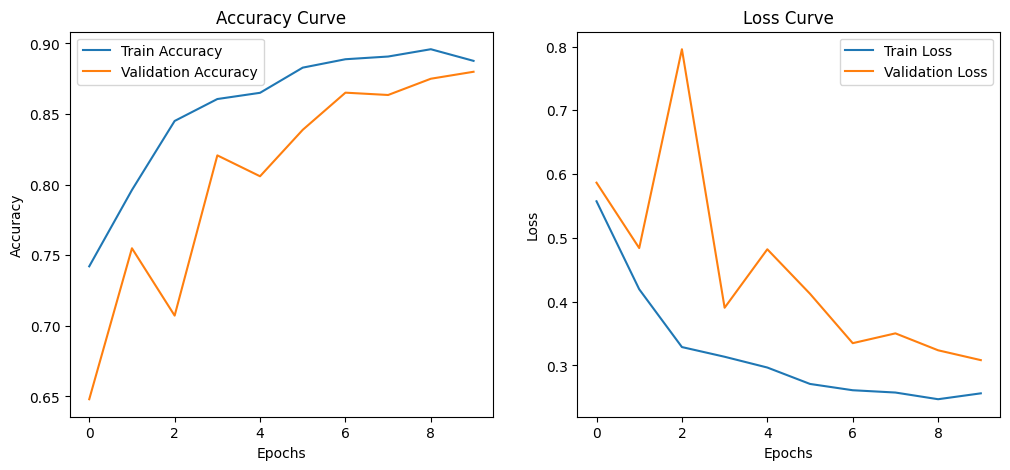

20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 273ms/step
Confusion Matrix:
[[ 81 153]
 [153 237]]

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.35      0.35       234
           1       0.61      0.61      0.61       390

    accuracy                           0.51       624
   macro avg       0.48      0.48      0.48       624
weighted avg       0.51      0.51      0.51       624



In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Plot accuracy and loss
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate on test set
test_generator.reset()
preds = model.predict(test_generator)
pred_labels = np.where(preds > 0.5, 1, 0)

print("Confusion Matrix:")
print(confusion_matrix(test_generator.classes, pred_labels))
print("\nClassification Report:")
print(classification_report(test_generator.classes, pred_labels))


In [42]:
import numpy as np
print("Train class counts:", np.bincount(train_generator.classes))
print("Test class counts:", np.bincount(test_generator.classes))


Train class counts: [1341 3875]
Test class counts: [234 390]


In [52]:
# Step 6.4: Build the CNN model
cnn_model = Sequential()

# 1️⃣ Convolutional Layer + MaxPooling
cnn_model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# 2️⃣ Second Convolutional Layer + MaxPooling
cnn_model.add(Conv2D(64, (3,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# 3️⃣ Third Convolutional Layer + MaxPooling
cnn_model.add(Conv2D(128, (3,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# 4️⃣ Flatten the output
cnn_model.add(Flatten())

# 5️⃣ Fully Connected Layers
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5)) # Reduce overfitting
cnn_model.add(Dense(1, activation='sigmoid')) # Binary classification

# 6️⃣ Compile the model
cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Summary of the model
cnn_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout

model = Sequential([
    Input(shape=(150, 150, 3)),          # Input layer
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(),

    GlobalAveragePooling2D(),             # Replaces Flatten
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')        # Binary classification
])

model.summary()




Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,889 (429.25 KB)

 Trainable params: 109,889 (429.25 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
# Install necessary packages
!pip install -q kaggle opendatasets tensorflow==2.18.0 gradio matplotlib seaborn scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 70.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.18.0 which is incompatible.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.18.0 which is incompatible.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.18.0 which is incompatible.
tensorstore 0.1.76 requires ml_dtypes>=0.5.0, but you have ml-dtypes 0.4.1 which is incompatible.


In [56]:
# Import libraries
import os
import opendatasets as od
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr

In [57]:
# Replace with your Kaggle dataset URL
dataset_url = "https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia"
od.download(dataset_url)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: bithalsahoo
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia


100%|██████████| 2.29G/2.29G [00:33<00:00, 72.7MB/s]


In [59]:
# Image data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load images
train_dir = '/content/chest-xray-pneumonia/chest_xray/train'
val_dir = '/content/chest-xray-pneumonia/chest_xray/val'
test_dir = '/content/chest-xray-pneumonia/chest_xray/test'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [60]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(),

    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,889 (429.25 KB)

 Trainable params: 109,889 (429.25 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stopping and best model saving
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', save_best_only=True)
]

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=callbacks
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - accuracy: 0.7266 - loss: 0.5940

163/163 ━━━━━━━━━━━━━━━━━━━━ 84s 484ms/step - accuracy: 0.7266 - loss: 0.5938 - val_accuracy: 0.5000 - val_loss: 0.8622
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 70s 430ms/step - accuracy: 0.7429 - loss: 0.4836 - val_accuracy: 0.5625 - val_loss: 0.9615
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.7776 - loss: 0.4384

163/163 ━━━━━━━━━━━━━━━━━━━━ 70s 431ms/step - accuracy: 0.7776 - loss: 0.4384 - val_accuracy: 0.7500 - val_loss: 0.6301
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 70s 427ms/step - accuracy: 0.8097 - loss: 0.4078 - val_accuracy: 0.6250 - val_loss: 0.6771
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.8248 - loss: 0.3782

163/163 ━━━━━━━━━━━━━━━━━━━━ 70s 430ms/step - accuracy: 0.8249 - loss: 0.3780 - val_accuracy: 0.8125 - val_loss: 0.4143
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 69s 426ms/step - accuracy: 0.8531 - loss: 0.3227 - val_accuracy: 0.7500 - val_loss: 0.5175
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 69s 423ms/step - accuracy: 0.8611 - loss: 0.2965 - val_accuracy: 0.8125 - val_loss: 0.4835
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 70s 430ms/step - accuracy: 0.8726 - loss: 0.2884 - val_accuracy: 0.8125 - val_loss: 0.4370
Epoch 9/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 69s 423ms/step - accuracy: 0.8732 - loss: 0.2741 - val_accuracy: 0.6875 - val_loss: 0.5685
Epoch 10/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 70s 428ms/step - accuracy: 0.8877 - loss: 0.2575 - val_accuracy: 0.7500 - val_loss: 0.5136


20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 318ms/step - accuracy: 0.8139 - loss: 0.4716
Test Accuracy: 72.12%


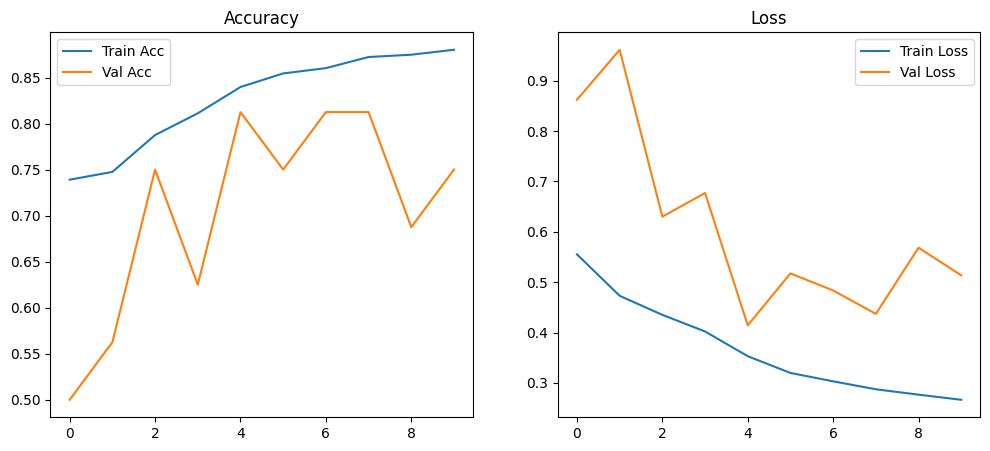

In [62]:
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc*100:.2f}%")

# Plot training curves
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title("Accuracy")
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title("Loss")
plt.show()


In [63]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_image(img):
    img = img.resize((150,150))
    img_array = np.array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)
    pred = model.predict(img_array)[0][0]
    if pred > 0.5:
        return "PNEUMONIA"
    else:
        return "NORMAL"

gr.Interface(fn=predict_image,
             inputs=gr.Image(type="pil"),
             outputs="text",
             title="Chest X-Ray Disease Prediction",
             description="Upload a chest X-ray image to predict Pneumonia or Normal").launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://619640758d92a0dec1.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [94]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_image(img):
    img = img.resize((150,150))
    img_array = np.array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)
    pred = model.predict(img_array)[0][0]
    if pred > 0.5:
        return "PNEUMONIA"
    else:
        return "NORMAL"

gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="Chest X-Ray Disease Prediction",
    description="Upload a chest X-ray image to predict Pneumonia or Normal"
).launch(share=True, debug=True)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://79cf0e4c746f35c0c0.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7861 <> https://22c8bb9e177832c834.gradio.live
Killing tunnel 127.0.0.1:7862 <> https://6cc94fc755086cd498.gradio.live
Killing tunnel 127.0.0.1:7863 <> https://6d24b543c4c5f8d987.gradio.live
Killing tunnel 127.0.0.1:7864 <> https://79cf0e4c746f35c0c0.gradio.live


In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [69]:
# Diabetes
df_diabetes = pd.read_csv("/content/diabetes/diabetes.csv")
X_diabetes = df_diabetes.drop("Outcome", axis=1)
y_diabetes = df_diabetes["Outcome"]

# Heart
df_heart = pd.read_csv("/content/heart/heart_cleveland_upload.csv")
X_heart = df_heart.drop("target", axis=1)
y_heart = df_heart["target"]

# CKD
df_ckd = pd.read_csv("/content/ckd/kidney_disease.csv")

# basic cleaning (drop NA + encode target)
df_ckd = df_ckd.dropna()
df_ckd["classification"] = df_ckd["classification"].map({"ckd":1, "notckd":0})
X_ckd = df_ckd.drop("classification", axis=1)
y_ckd = df_ckd["classification"]


KeyError: "['target'] not found in axis"

In [70]:
df_heart = pd.read_csv("/content/heart/heart_cleveland_upload.csv")
print(df_heart.head())
print(df_heart.columns)


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')


In [71]:
# Drop the target column and keep features
X_heart = df_heart.drop("condition", axis=1)

# Use 'condition' as target
y_heart = df_heart["condition"]

# If condition is already 0/1 → fine
# If it has values >1 (multi-class), convert to binary (0 = healthy, 1 = disease)
y_heart = y_heart.apply(lambda x: 1 if x > 0 else 0)


In [72]:
import pandas as pd

# ✅ Diabetes
df_diabetes = pd.read_csv("/content/diabetes/diabetes.csv")
X_diabetes = df_diabetes.drop("Outcome", axis=1)
y_diabetes = df_diabetes["Outcome"]

# ✅ Heart (target column is 'condition', not 'target')
df_heart = pd.read_csv("/content/heart/heart_cleveland_upload.csv")
X_heart = df_heart.drop("condition", axis=1)
y_heart = df_heart["condition"].apply(lambda x: 1 if x > 0 else 0)  # convert to binary

# ✅ CKD
df_ckd = pd.read_csv("/content/ckd/kidney_disease.csv")

# basic cleaning (drop NA + encode target)
df_ckd = df_ckd.dropna()
df_ckd["classification"] = df_ckd["classification"].map({"ckd": 1, "notckd": 0})
X_ckd = df_ckd.drop("classification", axis=1)
y_ckd = df_ckd["classification"]


In [75]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Copy CKD dataset to avoid warnings
df_ckd_clean = df_ckd.copy()

# Encode categorical columns
for col in df_ckd_clean.columns:
    if df_ckd_clean[col].dtype == 'object':   # if column is string
        le = LabelEncoder()
        df_ckd_clean[col] = le.fit_transform(df_ckd_clean[col])

# Now split features and target
X_ckd = df_ckd_clean.drop("classification", axis=1)
y_ckd = df_ckd_clean["classification"]

# Scale numerical + encoded features
scaler = StandardScaler()
X_ckd_scaled = scaler.fit_transform(X_ckd)


In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def build_ann(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')  # binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [77]:
from sklearn.model_selection import train_test_split

# ---- Diabetes ----
X_train, X_test, y_train, y_test = train_test_split(X_diabetes_scaled, y_diabetes, test_size=0.2, random_state=42)
ann_diabetes = build_ann(X_train.shape[1])
ann_diabetes.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2)
loss, acc = ann_diabetes.evaluate(X_test, y_test, verbose=0)
print(f"✅ Diabetes ANN Accuracy: {acc:.4f}")

# ---- Heart ----
X_train, X_test, y_train, y_test = train_test_split(X_heart_scaled, y_heart, test_size=0.2, random_state=42)
ann_heart = build_ann(X_train.shape[1])
ann_heart.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2)
loss, acc = ann_heart.evaluate(X_test, y_test, verbose=0)
print(f"✅ Heart ANN Accuracy: {acc:.4f}")

# ---- CKD ----
X_train, X_test, y_train, y_test = train_test_split(X_ckd_scaled, y_ckd, test_size=0.2, random_state=42)
ann_ckd = build_ann(X_train.shape[1])
ann_ckd.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2)
loss, acc = ann_ckd.evaluate(X_test, y_test, verbose=0)
print(f"✅ CKD ANN Accuracy: {acc:.4f}")


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.5079 - loss: 0.7077 - val_accuracy: 0.6341 - val_loss: 0.6748
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6871 - loss: 0.6310 - val_accuracy: 0.6341 - val_loss: 0.6388
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6487 - loss: 0.6070 - val_accuracy: 0.6829 - val_loss: 0.6001
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7431 - loss: 0.5598 - val_accuracy: 0.6667 - val_loss: 0.5695
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7361 - loss: 0.5486 - val_accuracy: 0.7317 - val_loss: 0.5384
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7222 - loss: 0.5350 - val_accuracy: 0.7317 - val_loss: 0.5221
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7815 - loss: 0.4955 - val_accuracy: 0.7398 - val_loss: 0.5093
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7292 - loss: 0.5225 - val_accuracy: 0.7561 - val_loss: 0.4950
E

In [78]:
from sklearn.model_selection import train_test_split

# ---- Diabetes ----
X_train, X_test, y_train, y_test = train_test_split(X_diabetes_scaled, y_diabetes, test_size=0.2, random_state=42)
ann_diabetes = build_ann(X_train.shape[1])
ann_diabetes.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2)
loss, acc = ann_diabetes.evaluate(X_test, y_test, verbose=0)
print(f"✅ Diabetes ANN Accuracy: {acc:.4f}")

# ---- Heart ----
X_train, X_test, y_train, y_test = train_test_split(X_heart_scaled, y_heart, test_size=0.2, random_state=42)
ann_heart = build_ann(X_train.shape[1])
ann_heart.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2)
loss, acc = ann_heart.evaluate(X_test, y_test, verbose=0)
print(f"✅ Heart ANN Accuracy: {acc:.4f}")

# ---- CKD ----
X_train, X_test, y_train, y_test = train_test_split(X_ckd_scaled, y_ckd, test_size=0.2, random_state=42)
ann_ckd = build_ann(X_train.shape[1])
ann_ckd.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.2)
loss, acc = ann_ckd.evaluate(X_test, y_test, verbose=0)
print(f"✅ CKD ANN Accuracy: {acc:.4f}")


Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - accuracy: 0.5143 - loss: 0.7073 - val_accuracy: 0.6748 - val_loss: 0.6718
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6775 - loss: 0.6331 - val_accuracy: 0.6748 - val_loss: 0.6184
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7155 - loss: 0.5875 - val_accuracy: 0.7154 - val_loss: 0.5809
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7644 - loss: 0.5205 - val_accuracy: 0.7236 - val_loss: 0.5545
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7399 - loss: 0.5483 - val_accuracy: 0.7154 - val_loss: 0.5315
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7451 - loss: 0.5279 - val_accuracy: 0.7317 - val_loss: 0.5140
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7842 - loss: 0.4618 - val_accuracy: 0.7398 - val_loss: 0.5032
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7865 - loss: 0.4647 - val_accuracy: 0.7480 - val_los

In [79]:
import numpy as np

# Diabetes Prediction Function
def predict_diabetes(pregnancies, glucose, bp, skinthickness, insulin, bmi, dpf, age):
    data = np.array([[pregnancies, glucose, bp, skinthickness, insulin, bmi, dpf, age]])
    data = scaler.fit_transform(data)  # scale input
    pred = ann_diabetes.predict(data)[0][0]
    return "Diabetes Detected" if pred > 0.5 else "No Diabetes"

# Heart Prediction Function
def predict_heart(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):
    data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach,
                      exang, oldpeak, slope, ca, thal]])
    data = scaler.fit_transform(data)
    pred = ann_heart.predict(data)[0][0]
    return "Heart Disease Detected" if pred > 0.5 else "No Heart Disease"

# CKD Prediction Function
def predict_ckd(*features):
    data = np.array([features])
    data = scaler.fit_transform(data)
    pred = ann_ckd.predict(data)[0][0]
    return "Chronic Kidney Disease Detected" if pred > 0.5 else "No CKD"


In [80]:
import gradio as gr

with gr.Blocks() as demo:
    gr.Markdown("## 🏥 Smart Health Prediction (Diabetes, Heart, CKD)")

    with gr.Tab("Diabetes"):
        inputs_diabetes = [
            gr.Number(label="Pregnancies"),
            gr.Number(label="Glucose"),
            gr.Number(label="Blood Pressure"),
            gr.Number(label="Skin Thickness"),
            gr.Number(label="Insulin"),
            gr.Number(label="BMI"),
            gr.Number(label="Diabetes Pedigree Function"),
            gr.Number(label="Age"),
        ]
        output_diabetes = gr.Textbox()
        gr.Interface(fn=predict_diabetes, inputs=inputs_diabetes, outputs=output_diabetes).render()

    with gr.Tab("Heart Disease"):
        inputs_heart = [
            gr.Number(label="Age"),
            gr.Number(label="Sex (1=Male, 0=Female)"),
            gr.Number(label="Chest Pain Type"),
            gr.Number(label="Resting BP"),
            gr.Number(label="Cholesterol"),
            gr.Number(label="Fasting Blood Sugar"),
            gr.Number(label="Rest ECG"),
            gr.Number(label="Max Heart Rate"),
            gr.Number(label="Exercise Angina"),
            gr.Number(label="Oldpeak"),
            gr.Number(label="Slope"),
            gr.Number(label="CA"),
            gr.Number(label="Thal"),
        ]
        output_heart = gr.Textbox()
        gr.Interface(fn=predict_heart, inputs=inputs_heart, outputs=output_heart).render()

    with gr.Tab("CKD"):
        inputs_ckd = [gr.Number(label=f"Feature {i+1}") for i in range(X_ckd.shape[1])]
        output_ckd = gr.Textbox()
        gr.Interface(fn=predict_ckd, inputs=inputs_ckd, outputs=output_ckd).render()

demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://22c8bb9e177832c834.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import gradio as gr

# ====== Load datasets ======

# Diabetes
df_diabetes = pd.read_csv("/content/diabetes/diabetes.csv")
X_diabetes = df_diabetes.drop("Outcome", axis=1)
y_diabetes = df_diabetes["Outcome"]

# Heart
df_heart = pd.read_csv("/content/heart/heart_cleveland_upload.csv")
X_heart = df_heart.drop("condition", axis=1)
y_heart = df_heart["condition"].apply(lambda x: 1 if x > 0 else 0)

# CKD
df_ckd = pd.read_csv("/content/ckd/kidney_disease.csv").dropna()
df_ckd["classification"] = df_ckd["classification"].map({"ckd":1,"notckd":0})
# Encode categorical columns
for col in df_ckd.columns:
    if df_ckd[col].dtype == "object":
        le = LabelEncoder()
        df_ckd[col] = le.fit_transform(df_ckd[col])
X_ckd = df_ckd.drop("classification", axis=1)
y_ckd = df_ckd["classification"]

# ====== Scale datasets ======
scaler_diabetes = StandardScaler()
X_diabetes_scaled = scaler_diabetes.fit_transform(X_diabetes)

scaler_heart = StandardScaler()
X_heart_scaled = scaler_heart.fit_transform(X_heart)

scaler_ckd = StandardScaler()
X_ckd_scaled = scaler_ckd.fit_transform(X_ckd)

# ====== Build ANN ======
def build_ann(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# ====== Train Models ======
# Diabetes
X_train, X_test, y_train, y_test = train_test_split(X_diabetes_scaled, y_diabetes, test_size=0.2, random_state=42)
ann_diabetes = build_ann(X_train.shape[1])
ann_diabetes.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# Heart
X_train, X_test, y_train, y_test = train_test_split(X_heart_scaled, y_heart, test_size=0.2, random_state=42)
ann_heart = build_ann(X_train.shape[1])
ann_heart.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# CKD
X_train, X_test, y_train, y_test = train_test_split(X_ckd_scaled, y_ckd, test_size=0.2, random_state=42)
ann_ckd = build_ann(X_train.shape[1])
ann_ckd.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# ====== Prediction Functions ======
def predict_diabetes(pregnancies, glucose, bp, skinthickness, insulin, bmi, dpf, age):
    data = np.array([[pregnancies, glucose, bp, skinthickness, insulin, bmi, dpf, age]])
    data = scaler_diabetes.transform(data)
    pred = ann_diabetes.predict(data)[0][0]
    return "Diabetes Detected" if pred > 0.5 else "No Diabetes"

def predict_heart(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):
    data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])
    data = scaler_heart.transform(data)
    pred = ann_heart.predict(data)[0][0]
    return "Heart Disease Detected" if pred > 0.5 else "No Heart Disease"

def predict_ckd(*features):
    data = np.array([features])
    data = scaler_ckd.transform(data)
    pred = ann_ckd.predict(data)[0][0]
    return "CKD Detected" if pred > 0.5 else "No CKD"

# ====== Gradio UI ======
with gr.Blocks() as demo:
    gr.Markdown("## 🏥 Smart Health Prediction (Diabetes, Heart, CKD)")

    with gr.Tab("Diabetes"):
        inputs_diabetes = [gr.Number(label=f) for f in ["Pregnancies","Glucose","Blood Pressure","Skin Thickness","Insulin","BMI","DPF","Age"]]
        output_diabetes = gr.Textbox()
        gr.Button("Predict").click(fn=predict_diabetes, inputs=inputs_diabetes, outputs=output_diabetes)

    with gr.Tab("Heart Disease"):
        inputs_heart = [gr.Number(label=f) for f in ["Age","Sex (1=Male,0=Female)","CP","Resting BP","Cholesterol","Fasting BS","Rest ECG","Max HR","Exercise Angina","Oldpeak","Slope","CA","Thal"]]
        output_heart = gr.Textbox()
        gr.Button("Predict").click(fn=predict_heart, inputs=inputs_heart, outputs=output_heart)

    with gr.Tab("CKD"):
        inputs_ckd = [gr.Number(label=f"Feature {i+1}") for i in range(X_ckd.shape[1])]
        output_ckd = gr.Textbox()
        gr.Button("Predict").click(fn=predict_ckd, inputs=inputs_ckd, outputs=output_ckd)

demo.launch(share=True)


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - accuracy: 0.6364 - loss: 0.6560 - val_accuracy: 0.7317 - val_loss: 0.5836
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7165 - loss: 0.5761 - val_accuracy: 0.7398 - val_loss: 0.5392
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7478 - loss: 0.5187 - val_accuracy: 0.7480 - val_loss: 0.5000
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7951 - loss: 0.4685 - val_accuracy: 0.7398 - val_loss: 0.4803
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7732 - loss: 0.4856 - val_accuracy: 0.7398 - val_loss: 0.4754
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7792 - loss: 0.4656 - val_accuracy: 0.7398 - val_loss: 0.4744
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7667 - loss: 0.4703 - val_accuracy: 0.7398 - val_loss: 0.4728
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8030 - loss: 0.4391 - val_accuracy: 0.7398 - val_loss: 0.4688
Ep

KeyboardInterrupt: 